# Transfer Functions
- 1st order system $H(s) = \frac{1}{Ts + 1}$ 
- 1st order system with time delay $H(s) = \frac{5e^{-\tau s}}{Ts + 1}$ 
- 1st order system with an integrator $H(s) = \frac{3}{s(Ts + 1)}$ 
- 2nd order system $H(s) = \frac{4}{3s^{2} + 2s + 1}$

## Control library functions

### Functions for Model creation and Manipulation

```python
- ctl.tf(num, den)            # transfer function
- ctl.ss(A, B, C, D)          # state space
- ctl.c2d(sys, Ts)            # continuous to discrete
- ctl.d2c(sys)                # discrete to continuous
- ctl.feedback(sys)           # feedback system
- ctl.tf2ss(sys)              # transfer function to state space
- ctl.ss2tf(sys)              # state space to transfer function
- ctl.series(sys1, sys2)      # series connection
- ctl.parallel(sys1, sys2)    # parallel connection
- ctl.pade(Ts, n)             # pade approximation
```
### Functions for Model Simulation

```python
- ctl.step_response(sys)                # step response
- ctl.lsim(sys, u, t)                   # linear simulation
- ctl.forced_response(sys, t, u0, X0)   # forced response
- ctl.initial_response(sys, t, X0)      # initial response
- ctl.impulse_response(sys)             # impulse response
```

### Functions for Analysis

```python
- ctl.step_info(sys)                    # step response info
- ctl.pole(sys)                         # poles of system
- ctl.zero(sys)                         # zeros of system
- ctl.damp(sys)                         # damping ratio
- ctl.pzmap(sys)                        # pole-zero map
- ctl.bode(sys)                         # bode plot
- ctl.stability_margins(sys)            # stability margins
- ctl.margin(sys)                       # stability margins
```





H(s) =  
   1
-------
3 s + 1

H(s) =  
   1
-------
3 s + 1

H(s) =  
    3
---------
2 s^2 + s

H1 =  
   3
-------
4 s + 2

H2 =  
6.512e-09
---------
    1

H(s) =  
   6 s + 1
-------------
s^2 + 4 s + 8



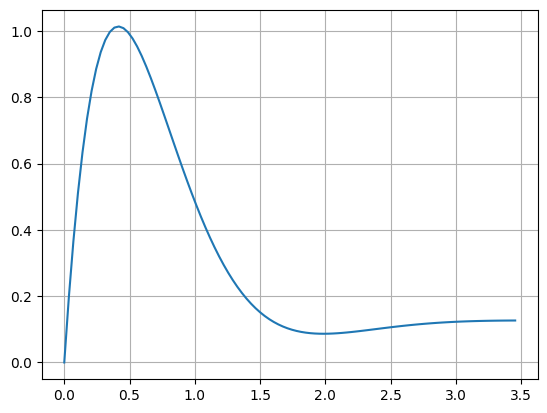

In [4]:
import numpy as np
import control as ctl
import math
import matplotlib.pyplot as plt

######### Control Library #########

# 1st order system
num = np.array([1])
den = np.array([3, 1])

H = ctl.tf(num,den)
print("H(s) = ", H)

# alternate way to model a transfer function
s = ctl.TransferFunction.s

H = (1)/(3*s + 1)
print("H(s) = ", H)

# 1st order system with integrator
num = np.array([3])
den = np.array ([2,1,0])    #s(2s + 1) = 2s^2 + s

H = ctl.tf(num,den)
print("H(s) = ", H)

# 1st order system with time delay
num_1= np.array([3])
den_1 = np.array([4,2])
H_1 = ctl.tf(num_1, den_1)
print("H1 = ", H_1)


num_2 = math.exp(-math.tau * 3)
den_2 = 1

H_2 = ctl.tf(num_2, den_2)
print("H2 = ", H_2)



# 2nd order system
num = np.array([6, 1])
den = np.array([1,4,8])

H = ctl.tf(num,den)
print("H(s) = ", H)


# Step response visualization
t,y = ctl.step_response(H)

plt.plot(t,y)
plt.grid()
plt.show()


H(s) =  TransferFunctionContinuous(
array([1.]),
array([1.        , 0.33333333, 0.        ]),
dt: None
)


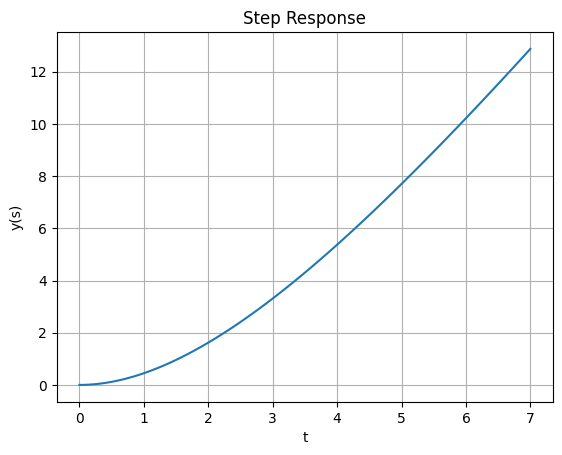

In [15]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import math

########### Scipy.Signal ############

K = 3
T = 3

num = np.array([K])
den_1 = np.array([T, 1])
den_2 = np.array([1,0])

den = np.convolve(den_2, den_1)

H = sig.TransferFunction(num,den)

print("H(s) = ", H)

# Step response
t,y = sig.step(H)

# Plotting
plt.plot(t,y)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("y(s)")
plt.grid()
plt.show()








Step Response with different T values

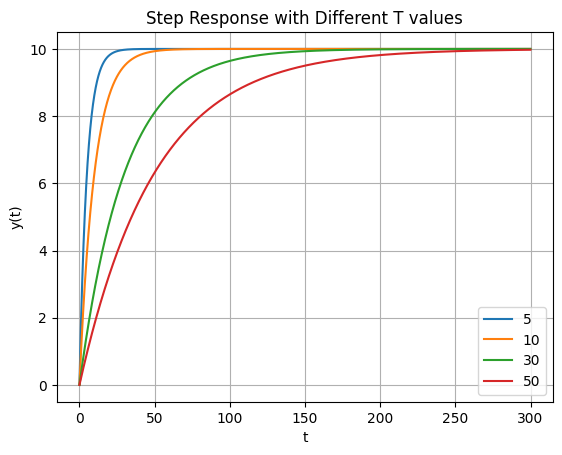

In [19]:
import control as ctl
import numpy as np

K = 10
T_array = [5,10,30,50]
t = np.arange(0, 300, 0.1)

for T in T_array:
    num = np.array([K])
    den = np.array([T, 1])

    H = ctl.tf(num, den)
    
    # step response
    t,y = ctl.step_response(H, t)

    # Plot
    plt.plot(t,y)

plt.title("Step Response with Different T values")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(T_array)
plt.grid()
plt.show()


Step Response with different K(gain) values

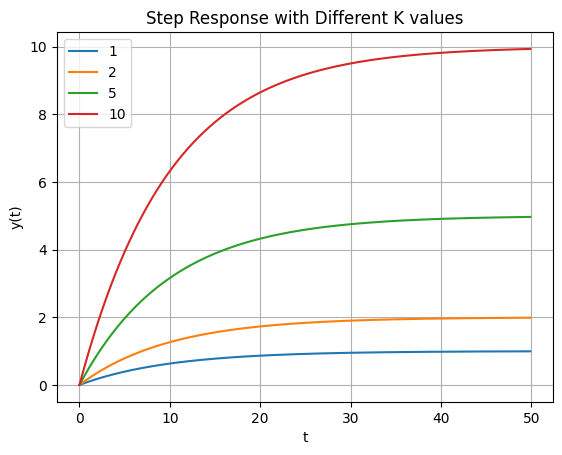

In [11]:
import control as ctl
import numpy as np

K_array = [1, 2, 5, 10]
T = 10
t = np.arange(0, 50, 0.1)

for K in K_array:
    num = np.array([K])
    den = np.array([T, 1])

    H = ctl.tf(num, den)
    
    # step response
    t,y = ctl.step_response(H, t)

    # Plot
    plt.plot(t,y)

plt.title("Step Response with Different K values")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(K_array)
plt.grid()
plt.show()

Integrator in a transfer function
- A Transfer function for an integrator will given by:
    $H(s) = \frac{y(s)}{u(s)} = \frac{K}{s}$

H(s) =  
3
-
s



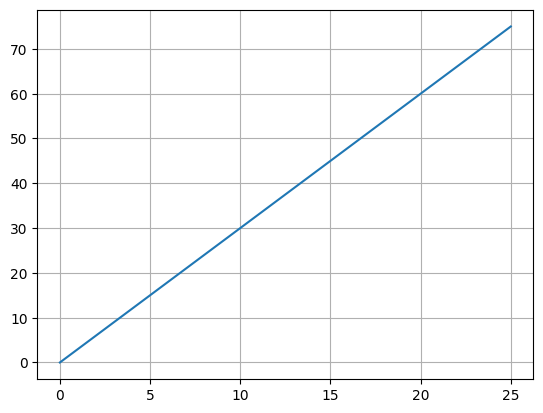

In [2]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

K = 3

num = np.array([K])
den = np.array([1,0])

H = ctl.tf(num, den)

print("H(s) = ", H)

t,y = ctl.step_response(H)

plt.plot(t,y)
plt.grid()
plt.show()

H(s) =  
1
-
s

H(s) =  
3
-
s

H(s) =  
5
-
s



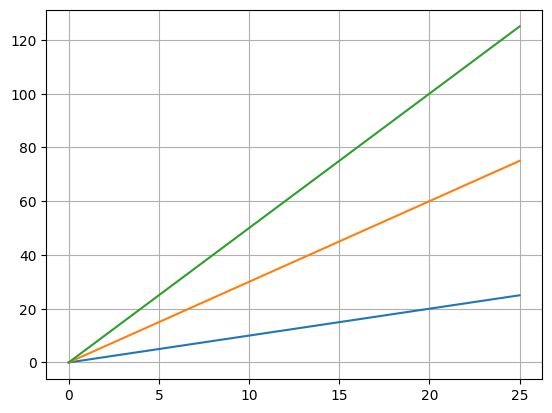

In [3]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

K_array = [1, 3, 5]

for K in K_array:
    num = np.array([K])
    den = np.array([1,0])

    H = ctl.tf(num, den)

    print("H(s) = ", H)

    t,y = ctl.step_response(H)

    plt.plot(t,y)
plt.grid()
plt.show()

Time Delay in a Transfer Function
- A Transfer function for time delay will be 
    $H(s) = \frac{y(s)}{u(s)} = \frac{K}{Ts + 1}e^{-\tau s}$

- First order Pade approximation will $e^{-\tau s} = \frac{1 - K_1s}{1 + K_1s}$ where $K_1 = -\frac{\tau}{2}$ 

- Second order Pade approximation will $e^{-\tau s} = \frac{1 - K_1s + K_2s}{1 + K_1s + K_2s}$ where $K_1 = -\frac{\tau}{2}$ and $K_2 = -\frac{\tau^{2}}{12}$

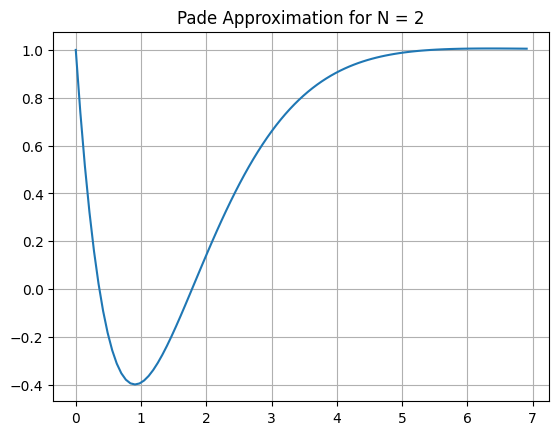

In [7]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Delay Period
Tau = 3

# Order of approximation 
N = 2

[num_pade, den_pade] = ctl.pade(Tau, N)
Hpade = ctl.tf(num_pade, den_pade)

t,y = ctl.step_response(Hpade)

plt.plot(t,y)
plt.title("Pade Approximation for N = 2")
plt.grid()
plt.show()

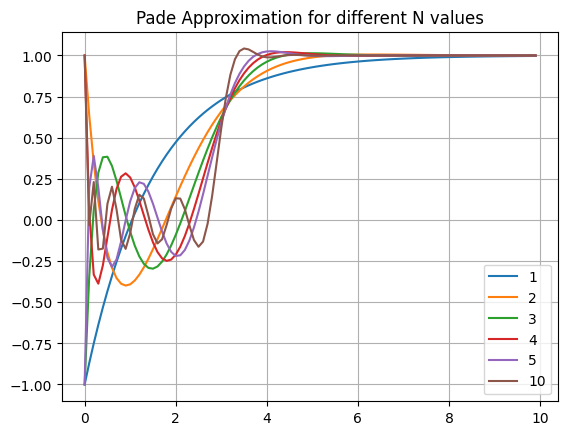

In [27]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Delay Period
Tau = 3

# Order of approximation 
N_array = [1,2,3,4,5, 10]



for N in N_array:

    [num_pade, den_pade] = ctl.pade(Tau, N)
    Hpade = ctl.tf(num_pade, den_pade)

    t = np.arange(0, 10, 0.1)
    
    t,y = ctl.step_response(Hpade, t)

    plt.plot(t,y)

plt.title("Pade Approximation for different N values")
plt.legend(N_array)
plt.grid()
plt.show()

Adding Time delay to a 1st order system
- The small wavy curves in the start of the plot, signify the added time delay $\tau$

H(s) =  
     -3 s^5 + 18 s^4 - 50.4 s^3 + 80.64 s^2 - 72.58 s + 29.03
------------------------------------------------------------------
4 s^6 + 25 s^5 + 73.2 s^4 + 124.3 s^3 + 123.6 s^2 + 62.9 s + 9.677



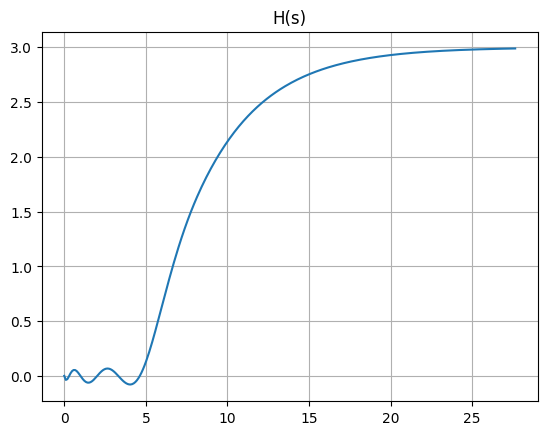

In [32]:
import control as ctl
import numpy as np
import matplotlib.pyplot as plt

# We initialize model parameters
K = 3
T = 4

# Model the transfer function according to the parameters
num = np.array([K])
den = np.array([T, 1])

H1 = ctl.tf(num, den)

# Initialize time delay parameter
Tau = 5

# Choose the order of approximation
N = 5

# Model the time delay transfer function
[num_pade, den_pade] = ctl.pade(Tau, N)
Hpade = ctl.tf(num_pade, den_pade)

H = ctl.series(H1, Hpade) 
print("H(s) = ", H)

t,y = ctl.step_response(H)

plt.plot(t,y)
plt.title("H(s)")
plt.grid()
plt.show()